In [38]:
import streamlit as st
from datetime import date

import yfinance as yf
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
from plotly import graph_objs as go

In [39]:
START = "2011-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

st.title('Aplikasi Prediksi Saham')

stocks = ('AMRT.JK', 'TLKM.JK', 'GOOG', 'AAPL', 'MSFT')
selected_stock = st.selectbox('Select dataset for prediction', stocks)

n_years = st.slider('Years of prediction:', 1, 5)
period = n_years * 365

In [40]:
st.cache()
def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

    
data_load_state = st.text('Loading data...')
data = load_data(selected_stock)
data_load_state.text('Loading data... done!')

st.subheader('Raw data')
st.write(data.tail())

[*********************100%***********************]  1 of 1 completed


In [41]:
# Plot raw data
def plot_raw_data():
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=data['Date'], y=data['Open'], name="stock_open"))
    fig.add_trace(go.Scatter(x=data['Date'], y=data['Close'], name="stock_close"))
    fig.layout.update(title_text='Time Series data with Rangeslider', xaxis_rangeslider_visible=True)
    st.plotly_chart(fig)
    
plot_raw_data()

In [42]:
# Predict forecast with Prophet.
df_train = data[['Date','Close']]
df_train = df_train.rename(columns={"Date": "ds", "Close": "y"})

m = Prophet()
m.fit(df_train)
future = m.make_future_dataframe(periods=period)
forecast = m.predict(future)

2021-12-02 13:39:24.782 Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


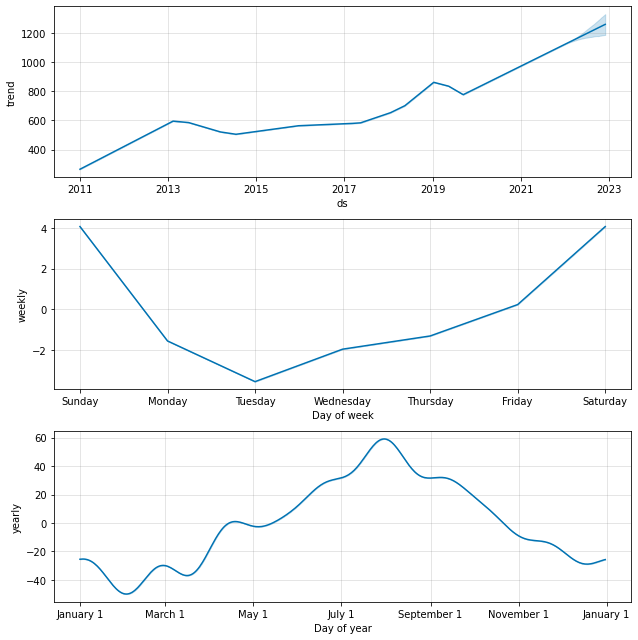

In [43]:
# Show and plot forecast
st.subheader('Forecast data')
st.write(forecast.tail())
    
st.write(f'Forecast plot for {n_years} years')
fig1 = plot_plotly(m, forecast)
st.plotly_chart(fig1)

st.write("Forecast components")
fig2 = m.plot_components(forecast)
st.write(fig2)